To make the ratio plots we talked about last week (basically noID AUC/ noglobAUC as a function of eta or other models over noglob (as a baseline) as a function of eta.

Also to make a plot of the average number of non-zero cells as a function of eta - not sure how yet?

In [11]:
#imports
import uproot as ur
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "6" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

from scipy.interpolate import interp1d

from Week7_PFNutils import *

In [2]:
data_path = '/fast_scratch/atlas_images/v01-45/' 

In [3]:
#import noID stuff (data and model)

noID = np.load(data_path+'nn_noID_w8.npz')
noID_model = tf.keras.models.load_model(data_path+'w8_pfn_noID.hdf5')

X_test_noid = noID['arr_2']
Y_test_noid = noID['arr_5']
eta_test_noid = noID['arr_8']

In [4]:
X_glob_te_noid = np.array(eta_test_noid)

In [5]:
eta_ranges = np.arange(0., 3.1, .1)+.05

selec_01 = abs(eta_test_noid) < 0.1
selec_02 = (abs(eta_test_noid) >= .1) & (abs(eta_test_noid) < .2)
selec_03 = (abs(eta_test_noid) >= .2) & (abs(eta_test_noid) < .3)
selec_04 = (abs(eta_test_noid) >= .3) & (abs(eta_test_noid) < .4)
selec_05 = (abs(eta_test_noid) >= .4) & (abs(eta_test_noid) < .5)
selec_06 = (abs(eta_test_noid) >= .5) & (abs(eta_test_noid) < .6)
selec_07 = (abs(eta_test_noid) >= .6) & (abs(eta_test_noid) < .7)
selec_08 = (abs(eta_test_noid) >= .7) & (abs(eta_test_noid) < .8)
selec_09 = (abs(eta_test_noid) >= .8) & (abs(eta_test_noid) < .9)
selec_10 = (abs(eta_test_noid) >= .9) & (abs(eta_test_noid) < 1.)
selec_11 = (abs(eta_test_noid) >= 1.) & (abs(eta_test_noid) < 1.1)
selec_12 = (abs(eta_test_noid) >= 1.1) & (abs(eta_test_noid) < 1.2)
selec_13 = (abs(eta_test_noid) >= 1.2) & (abs(eta_test_noid) < 1.3)
selec_14 = (abs(eta_test_noid) >= 1.3) & (abs(eta_test_noid) < 1.4)
selec_15 = (abs(eta_test_noid) >= 1.4) & (abs(eta_test_noid) < 1.5)
selec_16 = (abs(eta_test_noid) >= 1.5) & (abs(eta_test_noid) < 1.6)
selec_17 = (abs(eta_test_noid) >= 1.6) & (abs(eta_test_noid) < 1.7)
selec_18 = (abs(eta_test_noid) >= 1.7) & (abs(eta_test_noid) < 1.8)
selec_19 = (abs(eta_test_noid) >= 1.8) & (abs(eta_test_noid) < 1.9)
selec_20 = (abs(eta_test_noid) >= 1.9) & (abs(eta_test_noid) < 2.)
selec_21 = (abs(eta_test_noid) >= 2.) & (abs(eta_test_noid) < 2.1)
selec_22 = (abs(eta_test_noid) >= 2.1) & (abs(eta_test_noid) < 2.2)
selec_23 = (abs(eta_test_noid) >= 2.2) & (abs(eta_test_noid) < 2.3)
selec_24 = (abs(eta_test_noid) >= 2.3) & (abs(eta_test_noid) < 2.4)
selec_25 = (abs(eta_test_noid) >= 2.4) & (abs(eta_test_noid) < 2.5)
selec_26 = (abs(eta_test_noid) >= 2.5) & (abs(eta_test_noid) < 2.6)
selec_27 = (abs(eta_test_noid) >= 2.6) & (abs(eta_test_noid) < 2.7)
selec_28 = (abs(eta_test_noid) >= 2.7) & (abs(eta_test_noid) < 2.8)
selec_29 = (abs(eta_test_noid) >= 2.8) & (abs(eta_test_noid) < 2.9)
selec_30 = (abs(eta_test_noid) >= 2.9) & (abs(eta_test_noid) < 3.)
selec_all = abs(eta_test_noid) <= 3. 

eta_sel_noid = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]

In [6]:
fps_noid, tps_noid, auc_noid = metrics(noID_model, X_test_noid, X_glob_te_noid, Y_test_noid, eta_sel_noid)

PFN AUC: 0.9673720965655478
PFN AUC: 0.9737930672749256
PFN AUC: 0.9717529828885793
PFN AUC: 0.9717779542473279
PFN AUC: 0.9706398479482959
PFN AUC: 0.9682665060009704
PFN AUC: 0.9747942752883597
PFN AUC: 0.9713209264044073
PFN AUC: 0.970460595836482
PFN AUC: 0.9701187454597388
PFN AUC: 0.9736620008878842
PFN AUC: 0.9717267401861808
PFN AUC: 0.9657295444416925
PFN AUC: 0.947056202442897
PFN AUC: 0.8910491607358189
PFN AUC: 0.9162024724650646
PFN AUC: 0.9392978547836593
PFN AUC: 0.9230099365190361
PFN AUC: 0.922138319887638
PFN AUC: 0.920353423882793
PFN AUC: 0.9336002315533634
PFN AUC: 0.9429646159052305
PFN AUC: 0.9430276419536854
PFN AUC: 0.9403375583881436
PFN AUC: 0.9291418946097167
PFN AUC: 0.9498074427698432
PFN AUC: 0.9779974215119072
PFN AUC: 0.9768061681288859
PFN AUC: 0.9815405695249926
PFN AUC: 0.9808043358307931
PFN AUC: 0.9543965468796821


In [19]:
reg95_noid = interp95(fps_noid, tps_noid)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


In [12]:
#then load up the noglob to compare it to: I'll use one of the new ones maybe
nog = np.load(data_path+'nn_splitdata_kd.npz')
nog_model = tf.keras.models.load_model(data_path+'w8_pfn_noglob_2.hdf5')

In [8]:
X_test_nog = nog['arr_2']
Y_test_nog = nog['arr_5']
eta_test_nog = nog['arr_11']

In [9]:
selec_01 = abs(eta_test_nog) < 0.1
selec_02 = (abs(eta_test_nog) >= .1) & (abs(eta_test_nog) < .2)
selec_03 = (abs(eta_test_nog) >= .2) & (abs(eta_test_nog) < .3)
selec_04 = (abs(eta_test_nog) >= .3) & (abs(eta_test_nog) < .4)
selec_05 = (abs(eta_test_nog) >= .4) & (abs(eta_test_nog) < .5)
selec_06 = (abs(eta_test_nog) >= .5) & (abs(eta_test_nog) < .6)
selec_07 = (abs(eta_test_nog) >= .6) & (abs(eta_test_nog) < .7)
selec_08 = (abs(eta_test_nog) >= .7) & (abs(eta_test_nog) < .8)
selec_09 = (abs(eta_test_nog) >= .8) & (abs(eta_test_nog) < .9)
selec_10 = (abs(eta_test_nog) >= .9) & (abs(eta_test_nog) < 1.)
selec_11 = (abs(eta_test_nog) >= 1.) & (abs(eta_test_nog)< 1.1)
selec_12 = (abs(eta_test_nog) >= 1.1) & (abs(eta_test_nog) < 1.2)
selec_13 = (abs(eta_test_nog) >= 1.2) & (abs(eta_test_nog) < 1.3)
selec_14 = (abs(eta_test_nog) >= 1.3) & (abs(eta_test_nog) < 1.4)
selec_15 = (abs(eta_test_nog) >= 1.4) & (abs(eta_test_nog) < 1.5)
selec_16 = (abs(eta_test_nog) >= 1.5) & (abs(eta_test_nog) < 1.6)
selec_17 = (abs(eta_test_nog) >= 1.6) & (abs(eta_test_nog) < 1.7)
selec_18 = (abs(eta_test_nog) >= 1.7) & (abs(eta_test_nog) < 1.8)
selec_19 = (abs(eta_test_nog) >= 1.8) & (abs(eta_test_nog) < 1.9)
selec_20 = (abs(eta_test_nog) >= 1.9) & (abs(eta_test_nog) < 2.)
selec_21 = (abs(eta_test_nog) >= 2.) & (abs(eta_test_nog) < 2.1)
selec_22 = (abs(eta_test_nog) >= 2.1) & (abs(eta_test_nog) < 2.2)
selec_23 = (abs(eta_test_nog) >= 2.2) & (abs(eta_test_nog) < 2.3)
selec_24 = (abs(eta_test_nog) >= 2.3) & (abs(eta_test_nog) < 2.4)
selec_25 = (abs(eta_test_nog) >= 2.4) & (abs(eta_test_nog) < 2.5)
selec_26 = (abs(eta_test_nog) >= 2.5) & (abs(eta_test_nog) < 2.6)
selec_27 = (abs(eta_test_nog) >= 2.6) & (abs(eta_test_nog) < 2.7)
selec_28 = (abs(eta_test_nog) >= 2.7) & (abs(eta_test_nog) < 2.8)
selec_29 = (abs(eta_test_nog) >= 2.8) & (abs(eta_test_nog) < 2.9)
selec_30 = (abs(eta_test_nog) >= 2.9) & (abs(eta_test_nog) < 3.)
selec_all = abs(eta_test_nog) <= 3. 

eta_sel_nog = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]

In [13]:
fps_nog, tps_nog, auc_nog = metrics_ng(nog_model, X_test_nog, Y_test_nog, eta_sel_nog)

PFN AUC: 0.9753472309465778
PFN AUC: 0.9796350646868066
PFN AUC: 0.9770954575111017
PFN AUC: 0.9770881531328296
PFN AUC: 0.9779038946174158
PFN AUC: 0.9738352964121317
PFN AUC: 0.9791915245338123
PFN AUC: 0.9782807221043079
PFN AUC: 0.9740826597216915
PFN AUC: 0.9740760943654034
PFN AUC: 0.9742068092865573
PFN AUC: 0.9720849365824135
PFN AUC: 0.9698283984641839
PFN AUC: 0.9552001959853522
PFN AUC: 0.9145006832551943
PFN AUC: 0.9248446341229253
PFN AUC: 0.9464350894754749
PFN AUC: 0.9343334900432285
PFN AUC: 0.9325822858328096
PFN AUC: 0.9345602998015032
PFN AUC: 0.9441115407747825
PFN AUC: 0.9503878821027663
PFN AUC: 0.9540285362076694
PFN AUC: 0.9536084931736885
PFN AUC: 0.949955870020509
PFN AUC: 0.9600960442045204
PFN AUC: 0.9835113694543995
PFN AUC: 0.9815741864462602
PFN AUC: 0.9846723039298446
PFN AUC: 0.9892299603338297
PFN AUC: 0.9623115578962591


In [20]:
reg95_nog = interp95(fps_nog, tps_nog)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


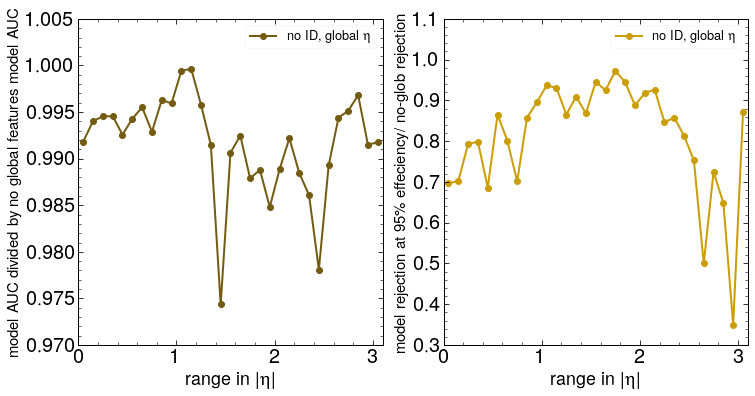

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])

ax1.set_xlim(0., 3.1)
ax1.set_ylabel('model AUC divided by no global features model AUC', fontsize=15)
ax1.plot(eta_ranges, np.array(auc_noid)/np.array(auc_nog), c='xkcd:mud', linewidth=2, marker='o', label='no ID, global $\eta$')
ax1.set_xlabel('range in |$\eta$|')
ax1.legend()

ax2.set_xlim(0., 3.1)
ax2.set_ylabel('model rejection at 95\% effeciency/ no-glob rejection', fontsize=15)
ax2.plot(eta_ranges, np.array(reg95_noid)/np.array(reg95_nog), c='xkcd:yellow ochre', linewidth=2, marker='o', label='no ID, global $\eta$')
ax2.set_xlabel('range in |$\eta$|')
ax2.legend()

In [28]:
#turn this into a util function so I can run it more:
def ratio_plot(AUC, REG95, auc_nog, reg95_nog, eta_ranges):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])

    ax1.set_xlim(0., 3.1)
    ax1.set_ylabel('model AUC divided by no global features model AUC', fontsize=15)
    ax1.plot(eta_ranges, np.array(AUC)/np.array(auc_nog), c='xkcd:mud', linewidth=2, marker='o', label='no ID, global $\eta$')
    ax1.set_xlabel('range in |$\eta$|')
    ax1.legend()

    ax2.set_xlim(0., 3.1)
    ax2.set_ylabel('model rejection at 95\% effeciency/ no-glob rejection', fontsize=15)
    ax2.plot(eta_ranges, np.array(REG95)/np.array(reg95_nog), c='xkcd:yellow ochre', linewidth=2, marker='o', label='no ID, global $\eta$')
    ax2.set_xlabel('range in |$\eta$|')
    ax2.legend()